In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Quiz1-Student Version_Questions2,4,5,6_Main_Dataset.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
xls.sheet_names
# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Лист1")

# Display the first few rows to understand its structure
df.head()
# Extracting the corruption level rating score column while skipping header rows
df_cleaned = df.iloc[2:, [4]].copy()
df_cleaned.columns = ["Corruption Score"]  # Rename the column

# Convert to numeric values
df_cleaned["Corruption Score"] = pd.to_numeric(df_cleaned["Corruption Score"], errors='coerce')

# Drop any remaining NaN values
df_cleaned = df_cleaned.dropna()

# Display summary statistics
df_cleaned.describe()
import numpy as np

# Extract mean and standard deviation
mean_srs = df_cleaned["Corruption Score"].mean()
std_dev = df_cleaned["Corruption Score"].std()
n = len(df_cleaned)

# Compute standard error
se_srs = std_dev / np.sqrt(n)

# Compute 95% confidence interval
t_value = 2.04
upper_limit = mean_srs + (t_value * se_srs)
lower_limit = mean_srs - (t_value * se_srs)

# Round values to 2 decimal places
mean_srs = round(mean_srs, 2)
se_srs = round(se_srs, 2)
upper_limit = round(upper_limit, 2)
lower_limit = round(lower_limit, 2)

mean_srs, se_srs, upper_limit, lower_limit


(52.28, 4.07, 60.58, 43.99)

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset, skipping unnecessary rows
df_full = pd.read_excel("Quiz1-Student Version_Questions2,4,5,6_Main_Dataset.xlsx", skiprows=1)

# Set the first row as the column header and clean data
df_full.columns = df_full.iloc[0]  # Use first row as column names
df_full = df_full[1:].reset_index(drop=True)  # Remove old header row

# Select the correct column names dynamically
stratum_col = "Stratum"
corruption_col = "Corruption level Rating Score (0-100)"

# Convert relevant columns to numeric
df_full[corruption_col] = pd.to_numeric(df_full[corruption_col], errors='coerce')
df_full = df_full.dropna(subset=[corruption_col, stratum_col])

# Total sample size (N)
N = len(df_full)

# Compute Wh, mean, and standard deviation for each stratum
stratum_stats = df_full.groupby(stratum_col)[corruption_col].agg(['count', 'mean', 'std']).reset_index()
stratum_stats.columns = ['Stratum', 'N_h', 'X_h', 's_h']
stratum_stats['W_h'] = stratum_stats['N_h'] / N  # Compute Wh

# Compute stratified mean
mean_stratified = (stratum_stats['W_h'] * stratum_stats['X_h']).sum()

# Compute standard error for stratified sampling
stratum_stats['SE_h'] = (stratum_stats['W_h'] ** 2) * (stratum_stats['s_h'] ** 2 / stratum_stats['N_h'])
se_stratified = np.sqrt(stratum_stats['SE_h'].sum())

# Compute standard error for Simple Random Sampling (SRS)
sample_mean = df_full[corruption_col].mean()
sample_std_dev = df_full[corruption_col].std(ddof=1)
se_srs = sample_std_dev / np.sqrt(N)

# Compute d-value and d-squared
d_value = se_stratified / se_srs
d_squared = d_value ** 2

# Compute Neff (Effective Sample Size)
Neff = d_squared * N

# Round values to 2 decimal places
mean_stratified = round(mean_stratified, 2)
se_stratified = round(se_stratified, 2)
d_value = round(d_value, 2)
d_squared = round(d_squared, 2)
Neff = round(Neff, 2)

# Print results
print(f"Stratum Weights (Wh):\n{stratum_stats[['Stratum', 'W_h']].to_string(index=False)}")
print(f"\nMean (Stratified): {mean_stratified}")
print(f"Standard Error (Stratified): {se_stratified}")
print(f"d-value: {d_value}")
print(f"d-squared: {d_squared}")
print(f"Neff (Effective Sample Size): {Neff}")


Stratum Weights (Wh):
      Stratum  W_h
 Central Asia 0.25
       Europe 0.25
North America 0.25
South America 0.25

Mean (Stratified): 52.28
Standard Error (Stratified): 2.18
d-value: 0.53
d-squared: 0.29
Neff (Effective Sample Size): 9.16


In [ ]:
import pandas as pd
import numpy as np

# Load dataset, skipping unnecessary rows
df = pd.read_excel("Quiz1-Student Version_Questions2,4,5,6_Main_Dataset.xlsx", skiprows=1)

# Set the first row as the column header and clean data
df.columns = df.iloc[0]  # Use first row as column names
df = df[1:].reset_index(drop=True)  # Remove old header row

# Select the correct column names dynamically
corruption_col = "Corruption level Rating Score (0-100)"

# Convert relevant columns to numeric
mean = df[corruption_col].mean().round(2)
print("Compute a mean:", mean)


df['Y'] = (df['Corruption level Rating Score (0-100)']-mean)**2
clusters = ['Canada', 'USA', 'Columbia', 'Brazil', 'Spain', 'France', 'Uzbekistan', 'Kazakhstan']
shc_values = []

for cluster in clusters:
    shc = df[df['Cluster'] == cluster]['Y'].sum() / 3
    shc_values.append(shc)

import math
SE_with_clustering = sum((0.125**2 * shc / 4) for shc in shc_values)

SE_with_clustering = math.sqrt(SE_with_clustering)
print("Compute a standard error for Clusteting Random Sampling:", round(SE_with_clustering, 2))

standart_error_srs = df['Corruption level Rating Score (0-100)'].sem()
d_value = round(SE_with_clustering / standart_error_srs, 2)

print("Compute d-value:", d_value)

d_squared = round(d_value**2, 2)
print("Compute d-squared:", d_squared)
# Compute roh
roh = (d_squared - 1 / 3)
print("Compute roh:", roh.round(2))
neff = round(len(df)/d_squared, 2)

print("Neff:", neff)

Compute a mean: 52.28
Compute a standard error for Clusteting Random Sampling: 4.62
Compute d-value: 1.14
Compute d-squared: 1.3
Compute roh: 0.97
Neff: 24.62


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# question 4

df = pd.read_csv('/content/Question4_Dataset.txt', header=None,
                 names=['Player', 'Penalty', 'FreeKick', 'Corner', 'Target'])

m = df.shape[0]
# Extract features and target
X = df[['Penalty', 'FreeKick', 'Corner']].values
y = df['Target'].values

# Add an intercept (bias) term (a column of ones)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# -----------------------------
# Define helper functions
# -----------------------------
def compute_cost(X, y, theta):
    """
    Compute the cost for linear regression.
    NOTE: Here we use 1/m (not 1/(2*m)) so that the cost
    matches the values in your reference table.
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/m) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Perform gradient descent to learn theta.
    """
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        # Gradient descent update
        theta = theta - (alpha/m) * (X.T.dot(error))
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

def run_experiment(iterations):
    """
    Run gradient descent for a given number of iterations and
    return the final cost, theta values, r2 score, and predictions.
    """
    alpha = 0.1
    theta = np.zeros(X.shape[1])
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
    final_cost = cost_history[-1]
    predictions = X.dot(theta)
    r2 = r2_score(y, predictions)
    return final_cost, theta, r2, predictions

# -----------------------------
# Run experiments for different iterations
# -----------------------------
results = {}
for n in [1, 10, 100, 1000]:
    cost, theta_vals, r2, preds = run_experiment(n)
    results[n] = (cost, theta_vals, r2, preds)




# question 5

# We take the columns Penalty, FreeKick, Corner as features.
X = df[['Penalty', 'FreeKick', 'Corner']].values
y = df['Target'].values

# Number of training examples
m = len(y)

# Add a column of ones for the intercept term
# so that X becomes [1, Penalty, FreeKick, Corner]
X = np.hstack([np.ones((m, 1)), X])

# ---------------------------------------------------------------------
# 3. Compute theta using the Normal Equation:
#    theta = (X^T * X)^(-1) * X^T * y
# ---------------------------------------------------------------------
# Note: In practice, you may want to use a pseudo-inverse for numerical stability.
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# ---------------------------------------------------------------------
# 4. Make predictions and compute r^2 score
# ---------------------------------------------------------------------
predictions = X @ theta
r2 = r2_score(y, predictions)


# question 4 results
print("{:<12} {:<14} {:<40} {:<8}".format(
    "# iterations",
    "Cost Function",
    "Optimal Values of Theta",
    "r2_score"
))
print("-" * 80)

# Data rows
for n in [1, 10, 100, 1000]:
    cost, theta_vals, r2, _ = results[n]
    cost_str = f"{cost:.3f}"
    theta_str = ", ".join([f"{theta:.3f}" for theta in theta_vals])
    r2_str = f"{r2:.3f}"
    print(f"n = {n:<10} {cost_str:<14} {theta_str:<40} {r2_str:<8}")

# -----------------------------
# Determine the player with the maximum predicted value after 1000 iterations
# -----------------------------
_, theta_1000, _, preds_1000 = results[1000]
max_index = np.argmax(preds_1000)
player_max = df.iloc[max_index]['Player']
print(f"\nWho has a maximum predicted value after 1000 iterations? {player_max}")


# question 5 results
print("Optimal values of theta (rounded to 3 decimals):")
for i, val in enumerate(theta):
    print(f"theta{i} = {val:.3f}")

print(f"\nr2-score value (rounded to 3 decimals): {r2:.3f}")

# iterations Cost Function  Optimal Values of Theta                  r2_score
--------------------------------------------------------------------------------
n = 1          4.392          0.194, 0.111, 0.083, 0.123               -1.274  
n = 10         1.567          0.922, 0.594, 0.290, 0.698               0.189   
n = 100        0.553          0.763, 1.455, -0.950, 2.029              0.714   
n = 1000       0.230          -0.115, 2.626, -1.786, 3.471             0.881   

Who has a maximum predicted value after 1000 iterations? Harry Kane
Optimal values of theta (rounded to 3 decimals):
theta0 = -0.133
theta1 = 2.639
theta2 = -1.779
theta3 = 3.485

r2-score value (rounded to 3 decimals): 0.881


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Define the dataset
data = {
    'Type': ['Efficient Buildings', 'Normal Buildings', 'Inefficient Buildings'],
    'Count': [273, 26, 56]
}
total_houses = sum(data['Count'])
df = pd.DataFrame(data)

# Step 2: Calculate pryoportions and standard errors
df['Proportion'] = (df['Count'] / total_houses).round(3)
df['Standard Error'] = (np.sqrt((df['Proportion'].round(3) * (1 - df['Proportion'].round(3))) / total_houses)).round(3)
print(df['Proportion'])
# Step 3: Calculate DEFF for clustering
rho = 0.02  # Intraclass correlation coefficient
m = 5  # Average cluster size
deff_clustering = 1 + rho * (m - 1)

# Adjust standard errors for clustering
df['Adjusted SE (Clustering)'] = (df['Standard Error'] * np.sqrt(deff_clustering)).round(3)

# Z-value for 95% confidence
z_value = 1.96

# Step 4: Calculate confidence intervals
df['Lower CI (Simple)'] = (df['Proportion'] - z_value * df['Standard Error']).round(3)
df['Upper CI (Simple)'] = (df['Proportion'] + z_value * df['Standard Error']).round(3)
df['Lower CI (Clustering)'] = (df['Proportion'] - z_value * df['Adjusted SE (Clustering)']).round(3)
df['Upper CI (Clustering)'] = (df['Proportion'] + z_value * df['Adjusted SE (Clustering)']).round(3)
df['DEFF (Clustering)'] = round(deff_clustering, 3)

# Display final results
print("Final Results with Clustering Adjustments:")
print(df)

# Optionally save to CSV
# df.to_csv("Building_Proportions_with_Clustering_Adjustments.csv", index=False)

0    0.769
1    0.073
2    0.158
Name: Proportion, dtype: float64
Final Results with Clustering Adjustments:
                    Type  Count  Proportion  Standard Error  \
0    Efficient Buildings    273       0.769           0.022   
1       Normal Buildings     26       0.073           0.014   
2  Inefficient Buildings     56       0.158           0.019   

   Adjusted SE (Clustering)  Lower CI (Simple)  Upper CI (Simple)  \
0                     0.023              0.726              0.812   
1                     0.015              0.046              0.100   
2                     0.020              0.121              0.195   

   Lower CI (Clustering)  Upper CI (Clustering)  DEFF (Clustering)  
0                  0.724                  0.814               1.08  
1                  0.044                  0.102               1.08  
2                  0.119                  0.197               1.08  


Sum of first + last row of normalized GPA: -0.549
Sum of first + last row of normalized SAT: -0.662
Initial Cost: 0.693
Optimized Theta: [2.794 1.791 1.598]
Final Cost Function Value: 0.277
Number of admitted students: 860
Number of not admitted students: 140
Regression Score (Accuracy): 0.866
Admission Probability: 0.975


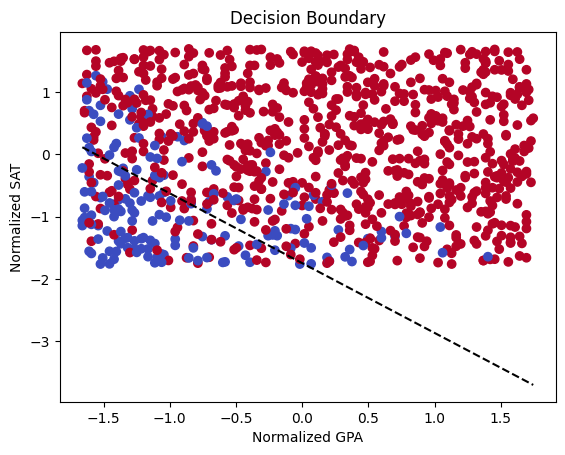

Real GPA: 3.18
Real SAT: 1064.38


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Question1_Dataset.txt", names=["GPA", "SAT", "Admitted"])

# Normalize GPA and SAT
mean_gpa, std_gpa = df["GPA"].mean(), df["GPA"].std()
mean_sat, std_sat = df["SAT"].mean(), df["SAT"].std()

df["GPA_norm"] = (df["GPA"] - mean_gpa) / std_gpa
df["SAT_norm"] = (df["SAT"] - mean_sat) / std_sat

# Sum of first and last row of normalized GPA & SAT
gpa_sum = df["GPA_norm"].iloc[0] + df["GPA_norm"].iloc[-1]
sat_sum = df["SAT_norm"].iloc[0] + df["SAT_norm"].iloc[-1]

# Round up to 3 decimal places
gpa_sum = round(gpa_sum, 3)
sat_sum = round(sat_sum, 3)

print("Sum of first + last row of normalized GPA:", gpa_sum)
print("Sum of first + last row of normalized SAT:", sat_sum)
# Question 2 | Step 2: Implement Logistic Regression
from scipy.optimize import minimize

# Add intercept column (x_0 = 1)
X = np.c_[np.ones(df.shape[0]), df["GPA_norm"], df["SAT_norm"]]
y = df["Admitted"].values
theta = np.zeros(X.shape[1])  # Initialize theta as [0,0,0]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Compute initial cost
initial_cost = cost_function(theta, X, y)
print("Initial Cost:", round(initial_cost, 3))
# Question 2 | Step 3: Optimize Theta Using Gradient Descent

# # Gradient function
def gradient(theta, X, y):
    m = len(y)
    return (1/m) * X.T @ (sigmoid(X @ theta) - y)

# Use minimize function from scipy.optimize
result = minimize(cost_function, theta, args=(X, y), method="BFGS", jac=gradient)

# Optimized theta
optimal_theta = result.x
final_cost = result.fun

print("Optimized Theta:", optimal_theta.round(3))
print("Final Cost Function Value:", round(final_cost, 3))
# Question 2 | Step 4: Predict Admission

# Prediction function
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Generate predictions
y_pred = predict(X, optimal_theta)

# Count admitted (1) and not admitted (0)
num_admitted = np.sum(y_pred == 1)
num_not_admitted = np.sum(y_pred == 0)

print("Number of admitted students:", num_admitted)
print("Number of not admitted students:", num_not_admitted)
# Question 3 | Step 5: Compute Model Accuracy

from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Regression Score (Accuracy):", round(accuracy, 3))
# Question 3 | Step 6: Compute Admission Probability for Given GPA & SAT

# Compute probability
test_point = np.array([1, 0.35, 0.15])  # Normalized values
admission_prob = sigmoid(test_point @ optimal_theta)

print("Admission Probability:", round(admission_prob, 3))
# Question 4 | Step 7: Plot Decision Boundary
import matplotlib.pyplot as plt

# Plot decision boundary
plot_x = np.array([df["GPA_norm"].min(), df["GPA_norm"].max()])
plot_y = -(optimal_theta[0] + optimal_theta[1] * plot_x) / optimal_theta[2]

plt.scatter(df["GPA_norm"], df["SAT_norm"], c=df["Admitted"], cmap="coolwarm")
plt.plot(plot_x, plot_y, color="black", linestyle="--")
plt.xlabel("Normalized GPA")
plt.ylabel("Normalized SAT")
plt.title("Decision Boundary")
plt.show()
# Question 5 | Step 8: Convert Normalized Scores Back to Real Values

real_gpa = 0.35 * std_gpa + mean_gpa
real_sat = 0.15 * std_sat + mean_sat

print("Real GPA:", round(real_gpa, 2))
print("Real SAT:", round(real_sat, 2))

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_gradients(X, A1, A2, Y, W2, Z1):
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)
    dB2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0)  # Derivative of ReLU
    dW1 = np.dot(dZ1, X.T)
    dB1 = np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2

def evaluate_model(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FN = confusion_matrix[0, 1]
    FP = confusion_matrix[1, 0]
    TN = confusion_matrix[1, 1]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return accuracy, precision, recall

# Fixed Data (Non-Random)
X = np.ones((2500, 1)) * 0.5  # Fixed input values
W1 = np.linspace(-0.01, 0.01, num=2500 * 128).reshape(128, 2500)
b1 = np.zeros((128, 1))
W2 = np.linspace(-0.01, 0.01, num=128).reshape(1, 128)
b2 = np.zeros((1, 1))
Y = np.array([[1]])  # Assume car is present

## Teacher Provided this code in his solution, maybe will be needed (I think is not needed, but maybe baby)
# # Simulated Data
# np.random.seed(42)
# X = np.random.rand(2500, 1)  # Random input
# W1 = np.random.rand(128, 2500) * 0.01
# b1 = np.zeros((128, 1))
# W2 = np.random.rand(1, 128) * 0.01
# b2 = np.zeros((1, 1))
# Y = np.array([[1]])  # Assume car is present

print("Question5")
# Forward propagation
Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
print("Predicted Probability (A2) (rounded):", A2.round(2))

print("\nQuestion6")

# Compute gradients
dW1, dB1, dW2, dB2 = compute_gradients(X, A1, A2, Y, W2, Z1)
print("Gradient dW2 shape:", dW2.shape)
print("Minimum of dW2:", dW2.min().round(2))
print("Maximum of dB2:", dB2.max().round(2))

print("\nQuestion7")

# Confusion Matrix
conf_matrix = np.array([[150, 50], [30, 270]])
accuracy, precision, recall = evaluate_model(conf_matrix)
print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\n")

# Multi-Class Softmax Example
Z_multiclass = np.array([2.1, 1.4, 0.5, -0.2]).reshape(-1, 1)
A_softmax = softmax(Z_multiclass)
print("Softmax Probabilities:", A_softmax.flatten().round(2))

vehicles_type = ["Pedestrian", "Truck", "Motorcycle", "Car"]
for i, v in enumerate(vehicles_type):
    print(f"Softmax Probabilities of {v}:", A_softmax.flatten().round(2)[i])

Question5
Predicted Probability (A2) (rounded): [[0.94]]

Question6
Gradient dW2 shape: (1, 128)
Minimum of dW2: -0.79
Maximum of dB2: -0.06

Question7
Accuracy: 0.84
Precision: 0.83
Recall: 0.75

Softmax Probabilities: [0.56 0.28 0.11 0.06]
Softmax Probabilities of Pedestrian: 0.56
Softmax Probabilities of Truck: 0.28
Softmax Probabilities of Motorcycle: 0.11
Softmax Probabilities of Car: 0.06


In [ ]:
import numpy as np

# Define the confusion matrix
conf_matrix = np.array([
    [50, 30, 0],  # Actual a
    [10, 20, 2],  # Actual b
    [8, 10, 30]   # Actual c
])

# Number of classes
num_classes = conf_matrix.shape[0]

# Initialize lists for storing results
precision, recall, f1_score = [], [], []

# Compute metrics for each class
for i in range(num_classes):
    TP = conf_matrix[i, i]  # True Positives
    FN = sum(conf_matrix[:, i]) - TP  # False Positives
    FP = sum(conf_matrix[i, :]) - TP  # False Negatives

    prec = TP / (TP + FP) if (TP + FP) > 0 else 0
    rec = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

    precision.append(prec)
    recall.append(rec)
    f1_score.append(f1)

# Print the results in table format
print("| Class | Precision | Recall | F1-score |")
print("|-------|-----------|--------|-----------|")
for i, cls in enumerate(['a', 'b', 'c']):
    print(f"| {cls} | {precision[i]:.3f} | {recall[i]:.3f} | {f1_score[i]:.3f} |")

| Class | Precision | Recall | F1-score |
|-------|-----------|--------|-----------|
| a | 0.625 | 0.735 | 0.676 |
| b | 0.625 | 0.333 | 0.435 |
| c | 0.625 | 0.938 | 0.750 |


### **Notations in Programming: Camel Case, Hungarian Notation, Pascal Case, and Acronyms Notation**  

In programming, different naming conventions are used to improve **readability** and **maintainability** of code. Below are four common notations:

---

## **1️⃣ Camel Case Notation (camelCase)**
**Definition:**  
- In **camel case**, the first letter of the first word is **lowercase**, and the first letter of subsequent words is **uppercase**.  
- Used in **variables, functions, and method names**.

**Example:**  
```python
userName = "JohnDoe"
totalAmountDue = 5000
calculateAverageScore()
```
✅ **Common Usage:**  
✔ **JavaScript** (functions, variables)  
✔ **Java, Python, C++** (variables, methods)

---

## **2️⃣ Hungarian Notation**
**Definition:**  
- **Prefix-based naming convention** where the **type or purpose** of a variable is included in its name.  
- Helps **identify variable types at a glance**.

**Example:**  
```c
int iCount = 10;  // "i" represents an integer
double dAverage = 3.14;  // "d" represents a double
char* szName = "Alice";  // "sz" represents a string (zero-terminated)
bool bIsActive = true;  // "b" represents a boolean
```
✅ **Common Usage:**  
✔ **Old Microsoft applications** (e.g., Windows API, Visual Basic)  
❌ **Modern programming avoids it** because variable types are usually inferred by the compiler.

---

## **3️⃣ Pascal Case Notation (PascalCase)**
**Definition:**  
- **Similar to camel case**, but **the first letter of every word is uppercase**, including the first word.  
- Often used for **class names, namespaces, and enums**.

**Example:**  
```python
class UserProfile:
    def GetUserInfo(self):
        pass
```
✅ **Common Usage:**  
✔ **C#, Java, Python (class names, namespaces)**  
✔ **Object-Oriented Programming (OOP)**  

---

## **4️⃣ Acronyms Notation (SCREAMING_SNAKE_CASE)**
**Definition:**  
- **All letters are uppercase**, and words are separated by **underscores**.  
- Typically used for **constants and environment variables**.

**Example:**  
```python
MAX_CONNECTIONS = 100
DATABASE_URL = "mysql://localhost"
```
✅ **Common Usage:**  
✔ **Python, C, C++ (constants, environment variables)**  
✔ **Config files and system-wide settings**  

---

## **📝 Summary Table**
| **Notation**          | **Format Example**    | **Use Cases** |
|----------------------|--------------------|----------------------------|
| **Camel Case**       | `myVariableName`   | Variables, function names (JavaScript, Python) |
| **Hungarian Notation** | `iCount`, `bFlag` | Old C/C++ programs, legacy Windows API |
| **Pascal Case**      | `MyClassName`      | Class names, namespaces (C#, Java, Python) |
| **Acronyms Notation** | `MAX_LIMIT`       | Constants, environment variables |

Each notation has its use case, and following **consistent conventions** makes the code **readable and maintainable**. 🚀

You're right to question that! Let's clarify **acronym notation** and its relationship with different naming conventions.  

### **Acronyms in Naming Conventions**
Acronyms can be written differently depending on the notation used. The most common ways acronyms appear in naming conventions are:

---

### **1️⃣ Camel Case (camelCase) with Acronyms**
- Acronyms are usually written in **title case** (only the first letter uppercase) to maintain readability.
- Example:
  ```java
  httpRequest  // NOT HTTPRequest
  userId       // NOT userID
  xmlParser    // NOT XMLParser
  ```
  ✅ **Common Usage:**  
  ✔ JavaScript, Java, Python (variables, methods)

---

### **2️⃣ Pascal Case (PascalCase) with Acronyms**
- Acronyms are usually **fully capitalized** to preserve their meaning.
- Example:
  ```csharp
  class XMLParser {}   // Correct in Pascal Case
  class HttpRequest {} // Mixed case for better readability
  ```
  ✅ **Common Usage:**  
  ✔ C#, Java, Python (class names, namespaces)

---

### **3️⃣ Upper Snake Case (SCREAMING_SNAKE_CASE) with Acronyms**
- Acronyms are **fully capitalized**, like other words.
- Example:
  ```python
  API_ENDPOINT = "https://example.com"
  MAX_CPU_USAGE = 80
  HTML_TAGS = ["div", "span", "p"]
  ```
  ✅ **Common Usage:**  
  ✔ Constants, environment variables (C, Python, config files)

---

### **4️⃣ Hungarian Notation with Acronyms**
- Acronyms follow the type prefix rule.
- Example:
  ```c
  char* szURL = "https://example.com"; // "sz" (string) + "URL" (acronym)
  int iHTTPStatus = 200; // "i" (integer) + "HTTP" (acronym)
  ```
  ✅ **Common Usage:**  
  ✔ Older Windows API, legacy C/C++ programs

---

### **📌 Summary**
| **Notation**          | **Example with Acronyms** |
|----------------------|---------------------------|
| **Camel Case**       | `httpRequest`, `userId` |
| **Pascal Case**      | `XMLParser`, `HttpRequest` |
| **Snake Case**       | `API_ENDPOINT`, `MAX_CPU_USAGE` |
| **Hungarian Notation** | `iHTTPStatus`, `szURL` |

🔹 **Key Rule:** In camelCase, **only the first letter of the acronym is capitalized** (`httpRequest`). In PascalCase, **entire acronyms are capitalized if short** (`XMLParser`), but long ones may use mixed case (`HttpRequest`).  

Would you like further refinements? 🚀

This assesses the speed, response time, stability, reliability, scalability, and resource usage of the software under specific workloads. → Performance Testing,

This ensures the application performs well consistently over an acceptable period. → Stability Testing,

This verifies the software’s stability and reliability under extreme conditions. → Stress Testing,

This combines data from one module with all other modules to test data flow between them → Non-Incremental Testing,

This type of testing focuses on individual units or components of the software. → Unit Testing,

This measures the system’s performance as the number of user requests increases or decreases → Scalability Testing,

This method integrates modules one by one to identify defects during development → Incremental Testing,

This non-functional testing ensures the software operates correctly across different hardware, operating systems, applications, network environments, or mobile devices. → Compatability Testing,

This refers to testing software using automation tools to meet the client’s needs. → Automation Testing,

This method tests lower-level modules first, using test drivers to pass data from higher to lower levels. → Bottom-Up Testing,

This approach tests the software’s functionalities without any knowledge of its internal code, paths, or implementation details. → Black Box Testing,

This evaluates the software’s performance under expected load conditions → Load Testing,


This ensures the software system meets the specified functional requirements → Functional Testing,

This evaluates non-functional aspects such as reliability, performance, load handling, and accountability of the software. → Non-Functional Testing,

This involves testing software based on the client’s requirements without the use of any automation tools. → Manual Testing,

This approach tests higher-level modules first, using stubs for any undeveloped submodules → Top-Down Testing,

This involves logically integrating and testing multiple software modules as a group. → Integration Testing,

Also known as User Experience Testing, it checks how user-friendly and easy to use the software is → Usability Testing,

This testing method examines the internal structure, design, data structures, code, and functionality of the software. → White Box Testing,

This method involves partial knowledge of the internal structure of the application, aiming to identify defects caused by improper code or application usage. → Grey Box Testing,

This validates the fully integrated software product. → System Testing

### **Software Testing Types: Stress, Performance, Integration, Functional, Regression, and Unit Testing**  

Software testing ensures that applications work correctly, efficiently, and reliably. Below are six key types of tests:

---

## **1️⃣ Unit Testing**
### ✅ **Purpose:**  
- Tests **individual components** (functions, methods, or classes) in isolation.  
- Ensures that each unit **works as expected** before integrating it with other parts.  

### 🔹 **Example:**
Testing a function that adds two numbers:  
```python
def add(a, b):
    return a + b

def test_add():
    assert add(2, 3) == 5
    assert add(-1, 1) == 0
```
### 🛠 **Common Tools:**
- **Python:** `pytest`, `unittest`
- **Java:** JUnit
- **JavaScript:** Jest

✅ **Who Performs It?** Developers  
✅ **When?** During development (early stage)  

---

## **2️⃣ Integration Testing**
### ✅ **Purpose:**  
- Tests how **different components/modules interact** with each other.  
- Ensures **data flow** between modules works as expected.  
- Finds issues **between** units, like API failures or database mismatches.  

### 🔹 **Example:**
- Testing if a **login module** correctly interacts with the **database**.
- Checking if a **payment gateway** integrates properly with an **e-commerce app**.

### 🛠 **Common Tools:**
- **Python:** `pytest-django`, `pytest-flask`
- **Java:** TestNG, JUnit with Spring Test
- **API Testing:** Postman, SoapUI  

✅ **Who Performs It?** Developers, Testers  
✅ **When?** After unit testing, before system testing  

---

## **3️⃣ Functional Testing**
### ✅ **Purpose:**  
- Tests **what the software does**, based on requirements/specifications.  
- Ensures that the system meets the expected behavior.  

### 🔹 **Example:**
✔ Clicking a "Submit" button should save user details.  
✔ Entering an invalid email should show an error message.  
✔ A search feature should return **relevant results**.

### 🛠 **Common Tools:**
- **Selenium** (Web UI)
- **Cypress** (JavaScript apps)
- **Postman** (API Testing)

✅ **Who Performs It?** Testers (Manual & Automation)  
✅ **When?** After unit and integration testing  

---

## **4️⃣ Regression Testing**
### ✅ **Purpose:**  
- Ensures **new updates or bug fixes** **don’t break existing features**.  
- Re-runs old test cases after changes in the code.  

### 🔹 **Example:**
- After **fixing a login bug**, make sure:
  - The **dashboard still loads correctly**.
  - The **logout function still works**.

### 🛠 **Common Tools:**
- **Selenium** (Web Automation)
- **Jenkins** (Continuous Testing)
- **TestNG, JUnit** (Java)

✅ **Who Performs It?** Testers (Automated or Manual)  
✅ **When?** Before deploying new features  

---

## **5️⃣ Performance Testing**
### ✅ **Purpose:**  
- Evaluates **speed, responsiveness, and stability** under different conditions.  
- Includes **load testing** (handling many users) and **stress testing** (extreme loads).  

### 🔹 **Example:**
- Testing if a website can handle **10,000 users simultaneously**.  
- Measuring how fast a **checkout process** completes under peak traffic.

### 🛠 **Common Tools:**
- **JMeter** (Load & Stress Testing)
- **Gatling** (Performance Testing)
- **Locust** (Python-based load testing)

✅ **Who Performs It?** Performance Testers  
✅ **When?** Before deployment, during system testing  

---

## **6️⃣ Stress Testing**
### ✅ **Purpose:**  
- Pushes the system **beyond its limits** to find failure points.  
- Checks **how the system recovers** after crashing.  

### 🔹 **Example:**
- Overloading a **server with 1 million requests** to see if it crashes.  
- Filling up a **database with extreme data** to check system behavior.  

### 🛠 **Common Tools:**
- **Apache JMeter**
- **Gatling**
- **LoadRunner**

✅ **Who Performs It?** Performance Testers  
✅ **When?** After performance testing, before launch  

---

## **📌 Summary Table**
| **Test Type**        | **Purpose** | **Example** |
|----------------------|------------|-------------|
| **Unit Testing**     | Tests **individual functions/methods** | Checking if `add(a, b)` returns the correct sum |
| **Integration Testing** | Tests **how components work together** | Ensuring the login system correctly interacts with the database |
| **Functional Testing** | Tests **user requirements** | Checking if clicking "Submit" saves a form |
| **Regression Testing** | Ensures **new changes don’t break existing features** | Re-running tests after updating the login system |
| **Performance Testing** | Checks **speed, stability, and scalability** | Measuring if a site loads in **less than 2 seconds** under **10,000 users** |
| **Stress Testing** | Tests **extreme conditions** | Overloading a server to find breaking points |

---

### **🚀 Final Notes**
✔ **Unit → Integration → Functional → Regression → Performance → Stress** (Testing order)  
✔ **Automation is key** for regression, performance, and stress testing.  
✔ **Always test early and frequently** to catch bugs before deployment.  

Would you like practical test cases for any of these? 🔍💡